In [29]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [30]:
df = pd.read_csv('yes_date_set.csv')
df.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,Holiday_Independence Day,Holiday_Independence Day (Observed),Holiday_Labor Day,"Holiday_Martin Luther King, Jr. Day",Holiday_Memorial Day,Holiday_New Year's Day,Holiday_None,Holiday_Thanksgiving,Holiday_Veterans Day,Holiday_Washington's Birthday
0,2013/8/29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,0,0,0,0,0,0,1,0,0,0
1,2013/8/30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,0,0,0,0,0,0,1,0,0,0
2,2013/8/31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,0,0,0,0,0,0,1,0,0,0
3,2013/9/1,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,0,0,0,0,0,0,1,0,0,0
4,2013/9/2,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
zip_code_94041 = df.zip_code_94041 == 1
zip_code_94063 = df.zip_code_94063 == 1
zip_code_94107 = df.zip_code_94107 == 1
zip_code_94301 = df.zip_code_94301 == 1
zip_code_95113 = df.zip_code_95113 == 1

In [32]:
df['transdate'] = pd.to_datetime(df['date'])
df['transdate'] = df['transdate'].dt.strftime('%B - %Y')

In [33]:
from dateutil.rrule import rrule, MONTHLY
import datetime

def month_year_iter( start_month, start_year, end_month, end_year ):
    ym_start= 12*start_year + start_month - 1
    ym_end= 12*end_year + end_month 
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        yield y, m+1

date_month_year =[]
for m in month_year_iter(8,2013,8,2016):
    month = datetime.date(1990, int(m[1]), 1).strftime('%B')
    date = '{} - {}'.format(month, m[0])
    date_month_year.append(date)
    
print(date_month_year)

['August - 2013', 'September - 2013', 'October - 2013', 'November - 2013', 'December - 2013', 'January - 2014', 'February - 2014', 'March - 2014', 'April - 2014', 'May - 2014', 'June - 2014', 'July - 2014', 'August - 2014', 'September - 2014', 'October - 2014', 'November - 2014', 'December - 2014', 'January - 2015', 'February - 2015', 'March - 2015', 'April - 2015', 'May - 2015', 'June - 2015', 'July - 2015', 'August - 2015', 'September - 2015', 'October - 2015', 'November - 2015', 'December - 2015', 'January - 2016', 'February - 2016', 'March - 2016', 'April - 2016', 'May - 2016', 'June - 2016', 'July - 2016', 'August - 2016']


In [34]:
date_monthNyear = []
for element in date_month_year:
    date_monthNyear.append(df.transdate == element)
    
# print(date_monthNyear[0])

### Getting Month_Year with each zipcode

In [35]:
def date_zipcode(date_zip, zipcode):
    date_zip = []
    for element in date_monthNyear:
        date_zip.append(df[element & zipcode])
    return date_zip

date_zipcode(df_dayN94041, zip_code_94041)
date_zipcode(df_dayN94063, zip_code_94063)
date_zipcode(df_dayN94107, zip_code_94107)
date_zipcode(df_dayN94301, zip_code_94301)
date_zipcode(df_dayN95113, zip_code_95113)
    

[          date  max_temperature_f  mean_temperature_f  min_temperature_f  \
 736  2013/8/29               81.0                72.0               63.0   
 737  2013/8/30               88.0                76.0               63.0   
 738  2013/8/31               80.0                71.0               62.0   
 
      max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
 736             62.0              61.0             59.0          87.0   
 737             63.0              60.0             55.0          93.0   
 738             59.0              57.0             54.0          90.0   
 
      mean_humidity  min_humidity  ...  Holiday_Independence Day (Observed)  \
 736           69.0          51.0  ...                                    0   
 737           65.0          37.0  ...                                    0   
 738           66.0          42.0  ...                                    0   
 
      Holiday_Labor Day  Holiday_Martin Luther King, Jr. Day  \
 736      

### Plotting scatter plot: trip count in each day in a month in a year corresponding to each zipcode 

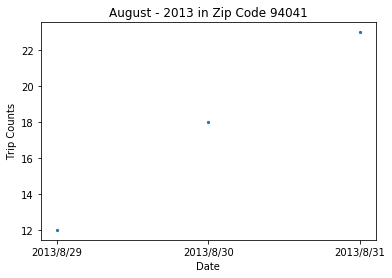

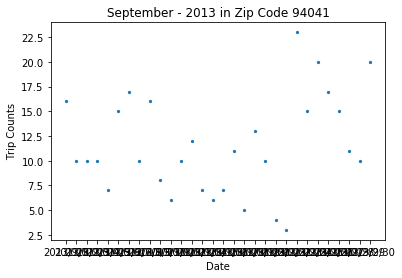

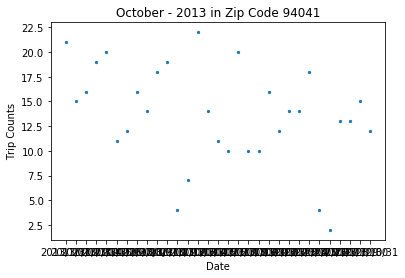

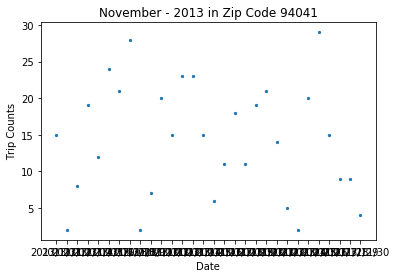

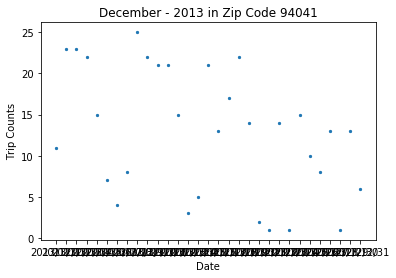

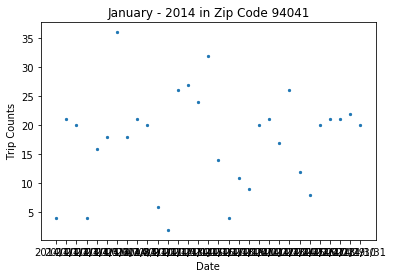

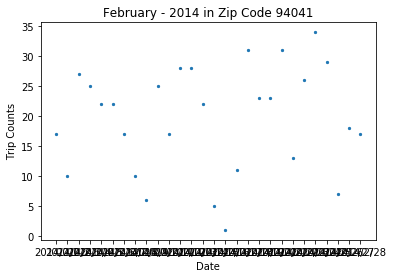

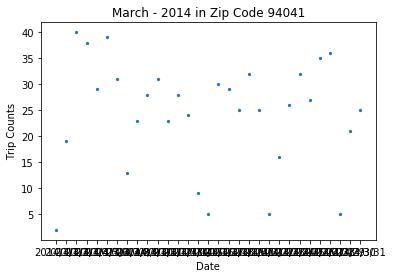

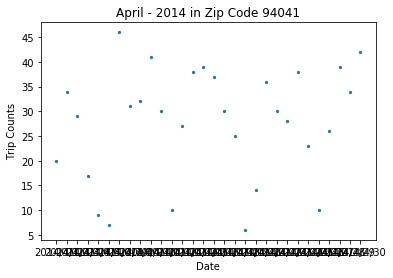

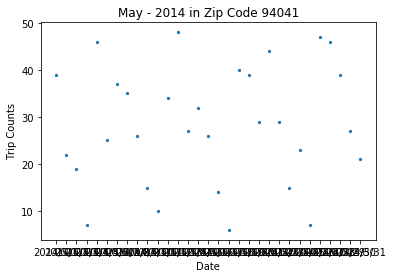

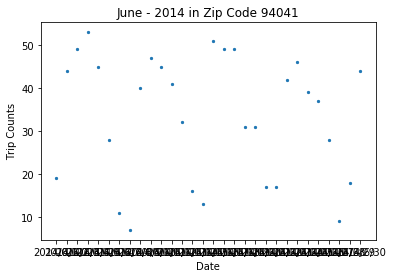

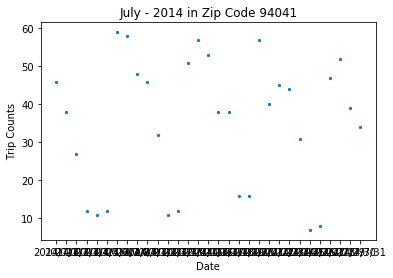

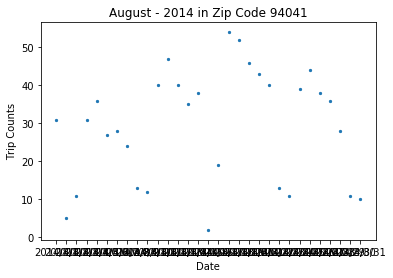

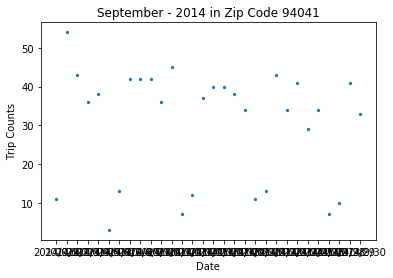

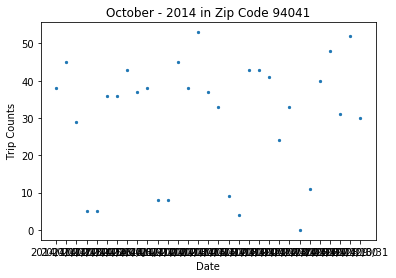

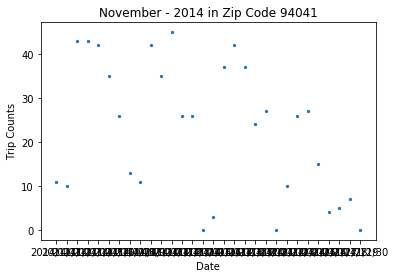

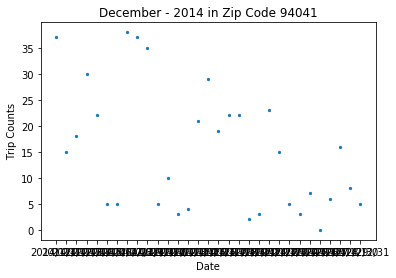

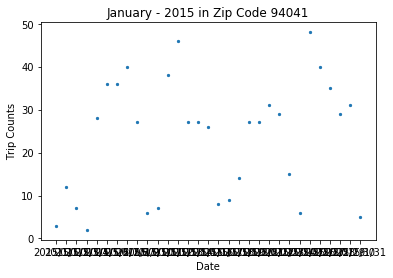

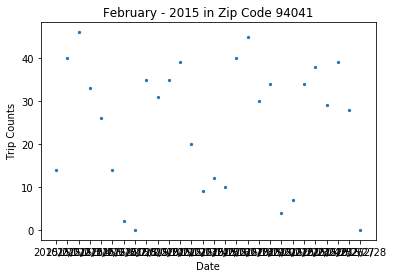

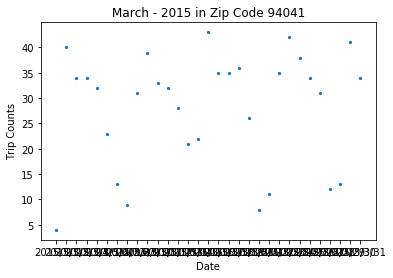

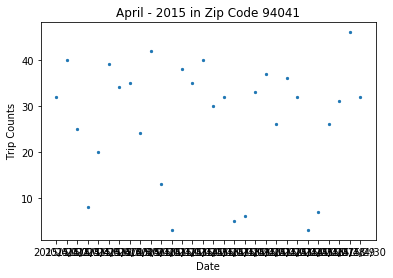

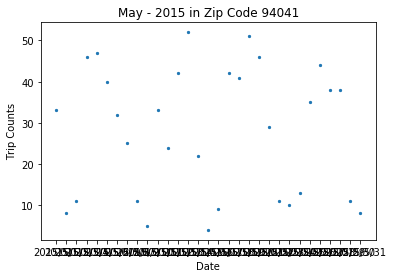

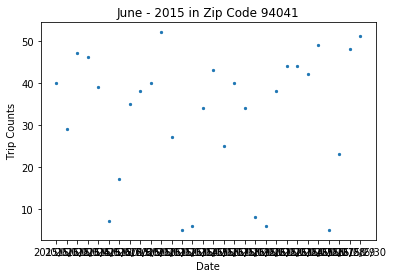

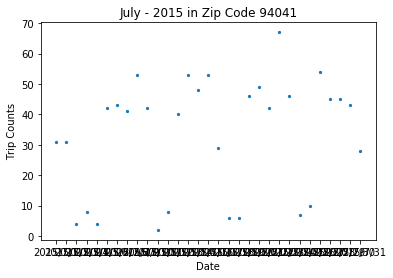

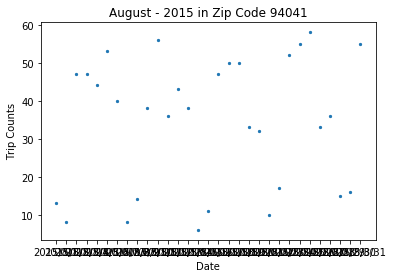

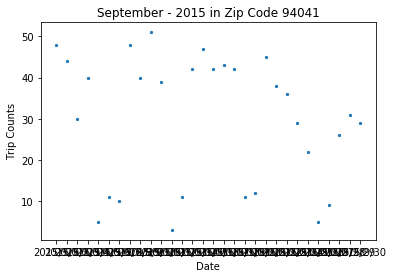

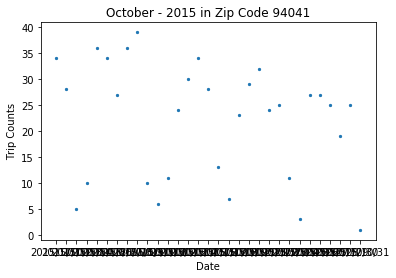

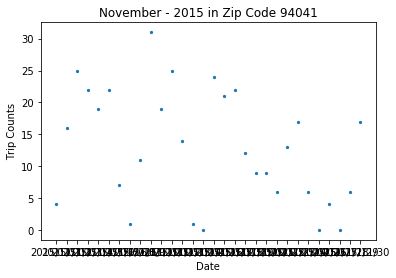

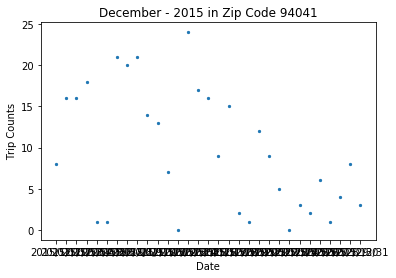

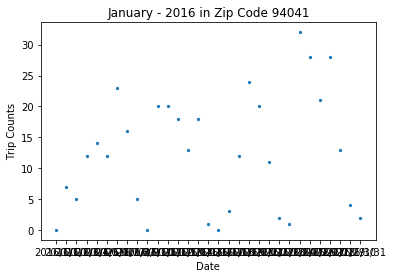

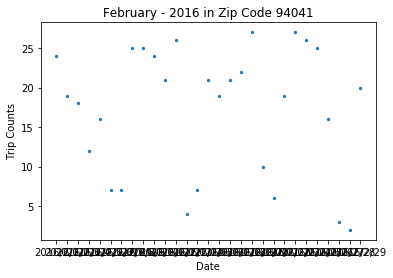

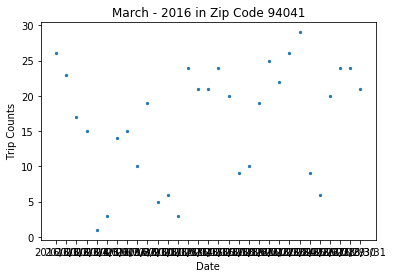

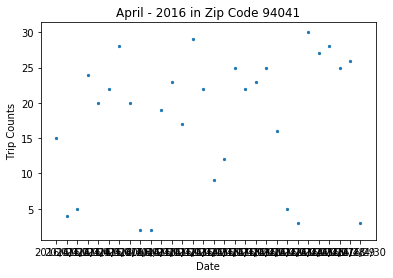

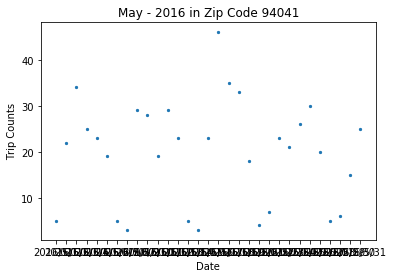

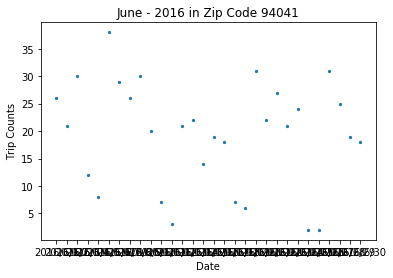

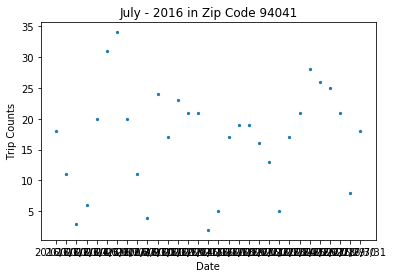

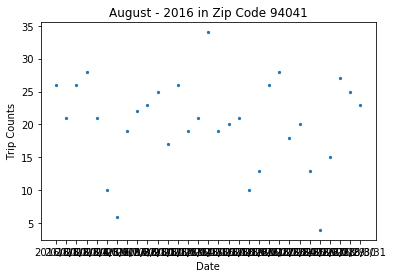

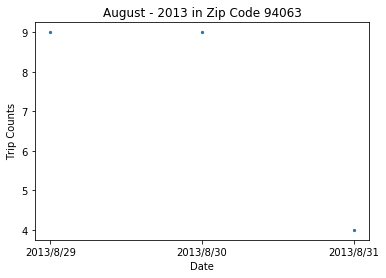

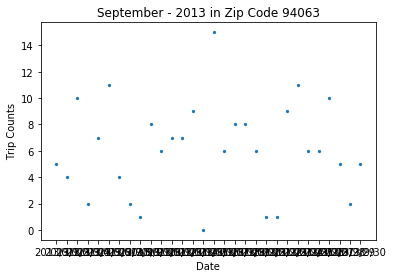

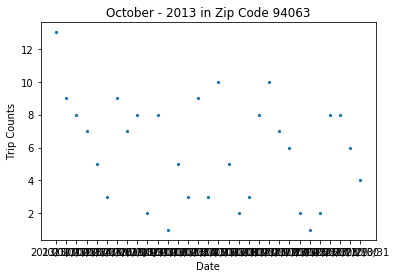

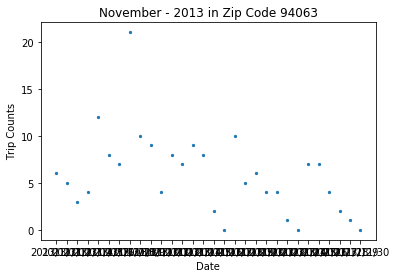

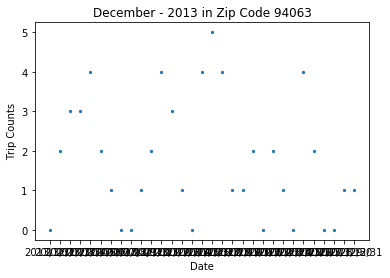

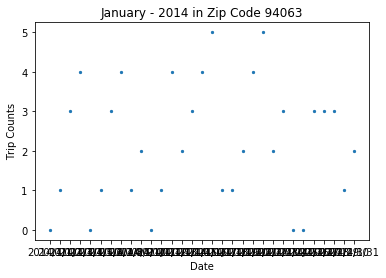

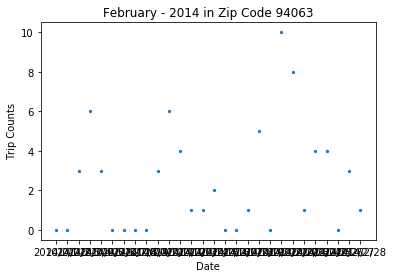

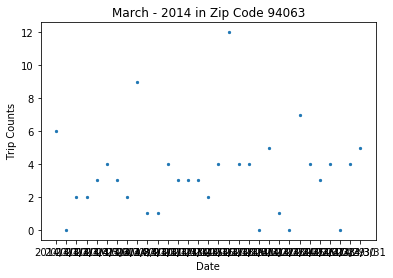

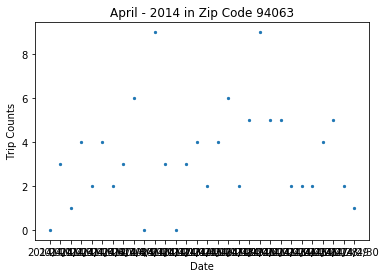

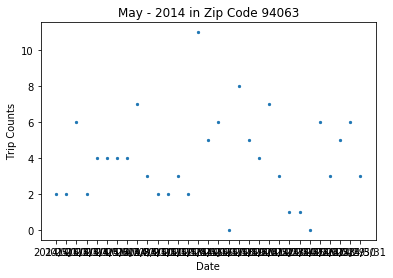

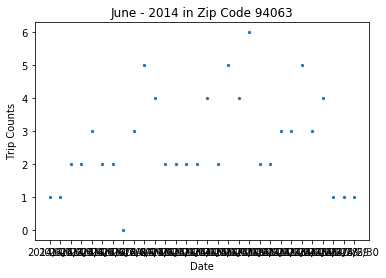

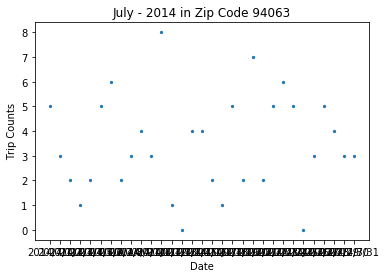

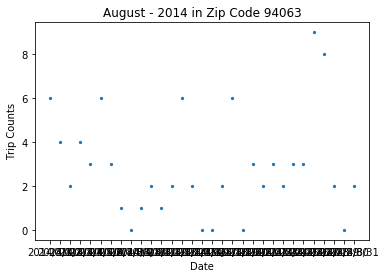

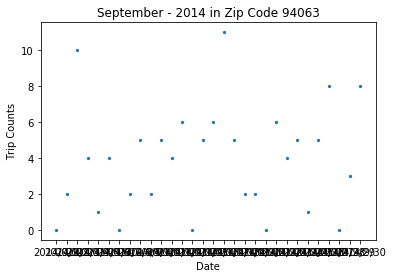

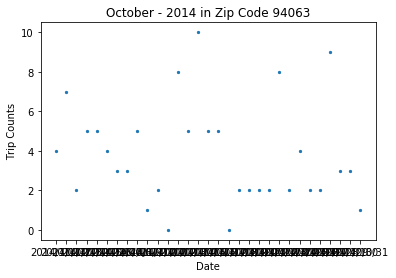

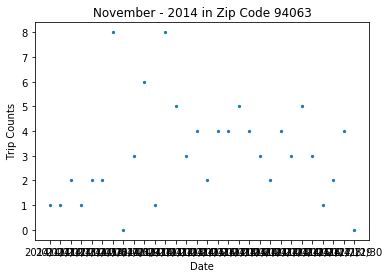

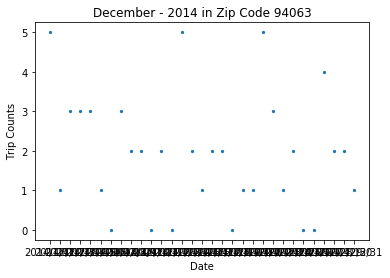

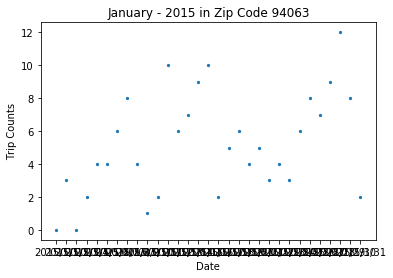

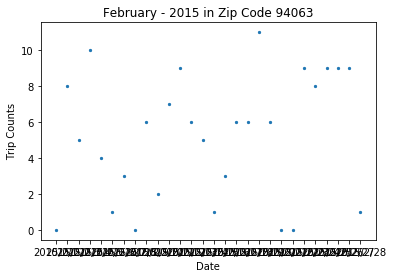

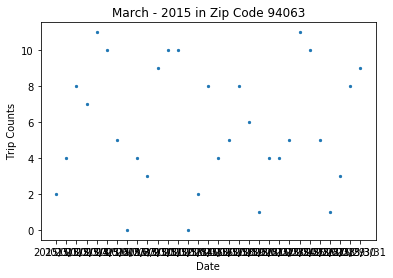

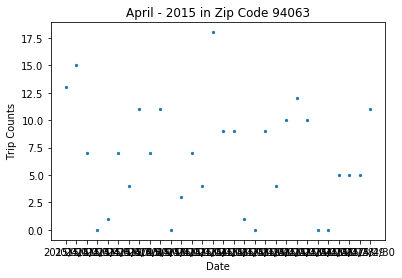

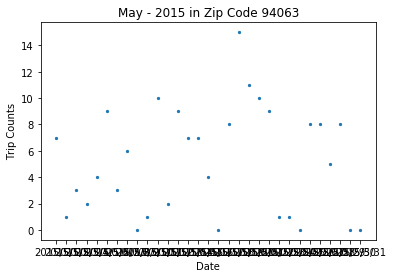

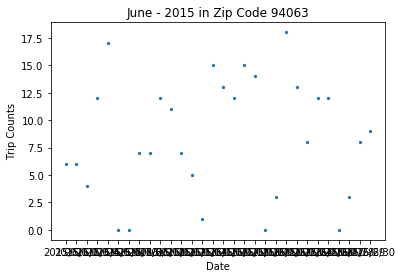

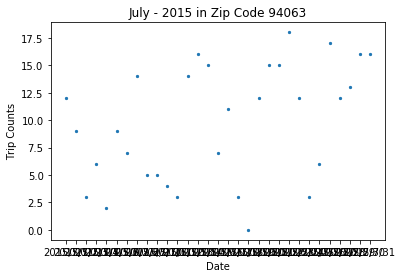

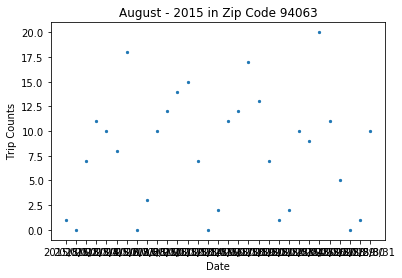

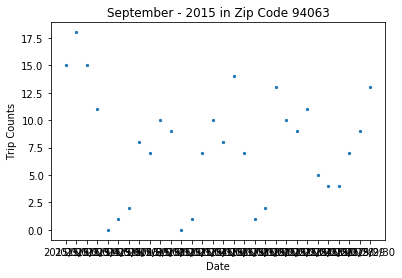

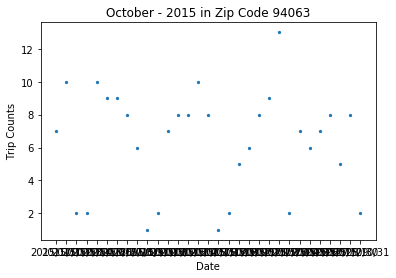

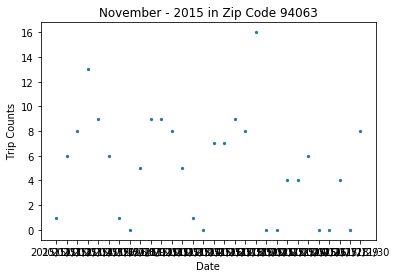

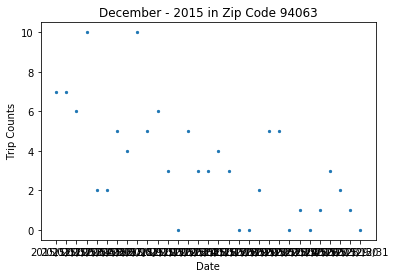

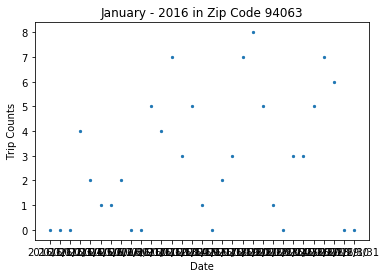

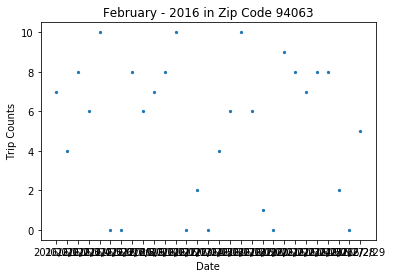

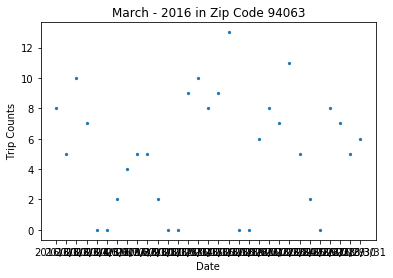

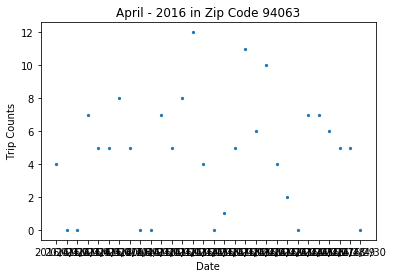

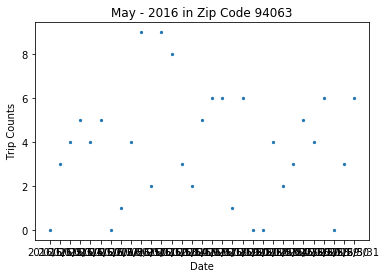

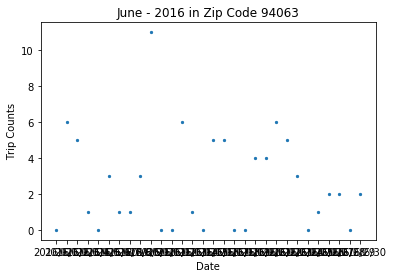

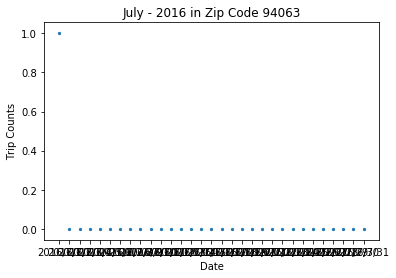

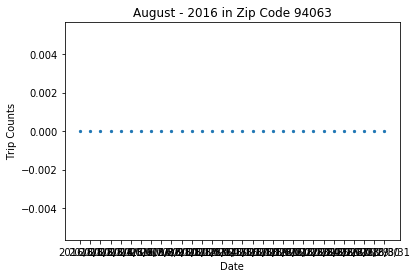

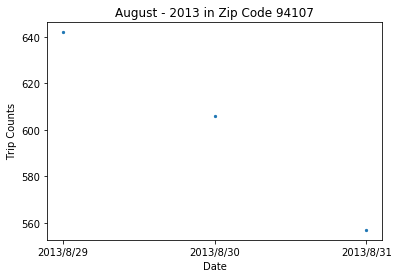

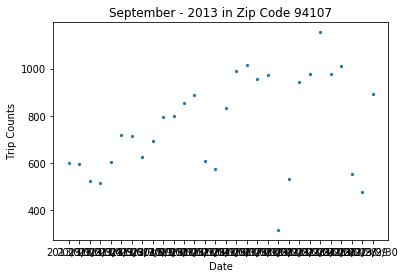

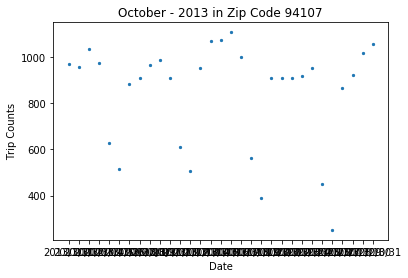

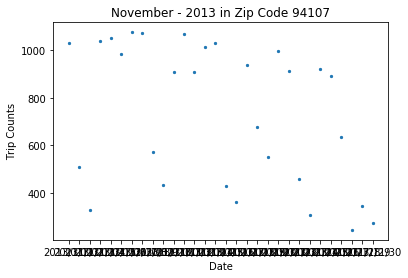

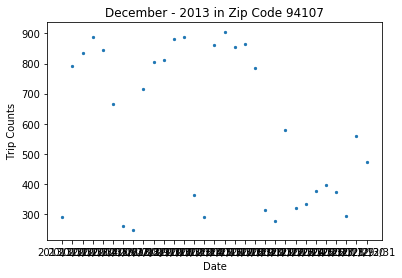

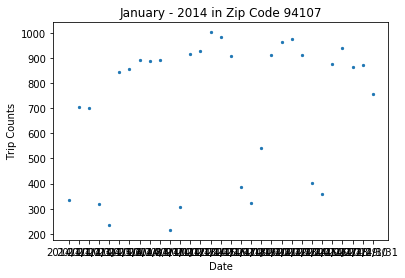

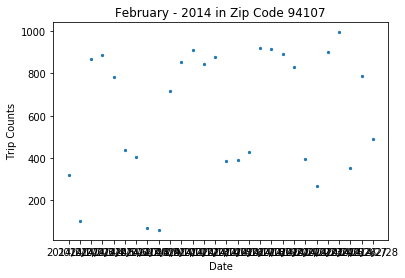

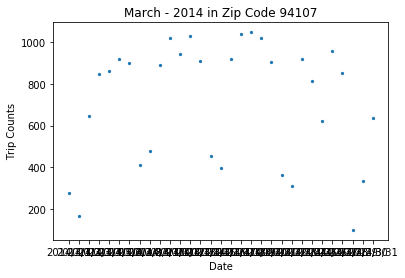

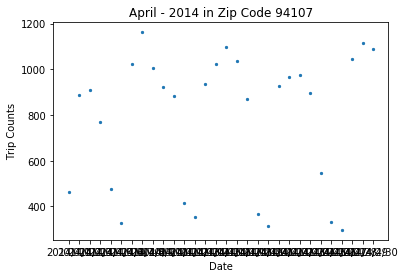

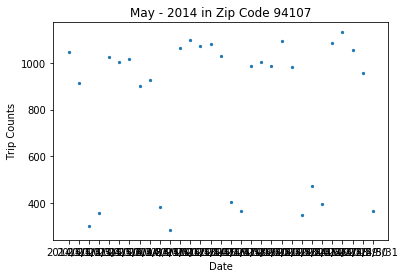

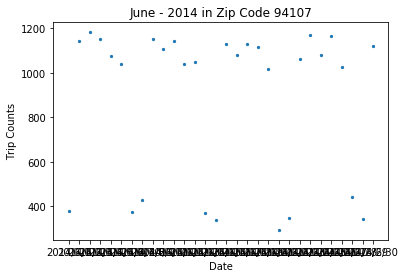

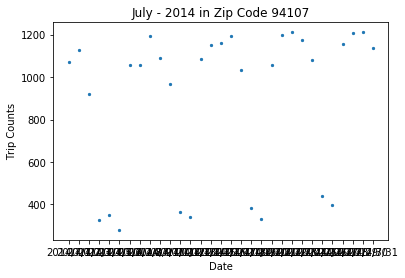

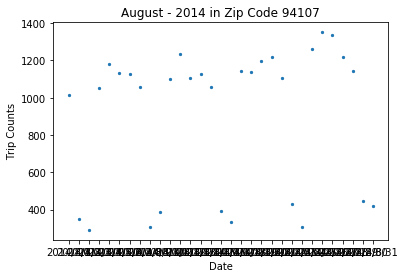

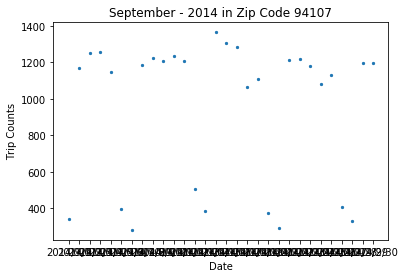

In [ ]:
def scatter_zipcode(ziplist, zipcode):
    df_list = []
    for c, n in enumerate(ziplist):
        plt.scatter(n.date, n.trip_count, 5)
        title = date_month_year[c] + " in Zip Code " + zipcode
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Trip Counts')
        plt.show()
        #print(c+1)
        #plt.savefig(title, dpi= 200)
        #plt.clf()

scatter_zipcode(df_dayN94041,'94041')        
scatter_zipcode(df_dayN94063,'94063')  
scatter_zipcode(df_dayN94107,'94107')
scatter_zipcode(df_dayN94301,'94301')
scatter_zipcode(df_dayN95113,'95113')